# Elementary Introduction to Linear Algebra with NumPy

This notebook is to be read with the slides.

Author: Pierre Nugues

_À mes anciens profs de maths, un élève respectueux_

_À ma HP-21_

In [1]:
import torch

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-10-29 10:35:19.883221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Creating vectors

In [5]:
np.array([2, 3])
np.array([1, 2, 3])

array([1, 2, 3])

In [6]:
torch.tensor([2, 3])
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

## Indices and Slices

In [7]:
vector = np.array([1, 2, 3, 4])
vector

array([1, 2, 3, 4])

In [8]:
vector[1] # 2

2

In [9]:
vector[:1] # [1]

array([1])

In [10]:
vector[1:3] # [2, 3]

array([2, 3])

In [11]:
vector = torch.tensor([1, 2, 3, 4])
vector

tensor([1, 2, 3, 4])

In [12]:
vector[0]

tensor(1)

In [13]:
vector[:1]

tensor([1])

In [14]:
vector[1:3]

tensor([2, 3])

## Visualizing vectors

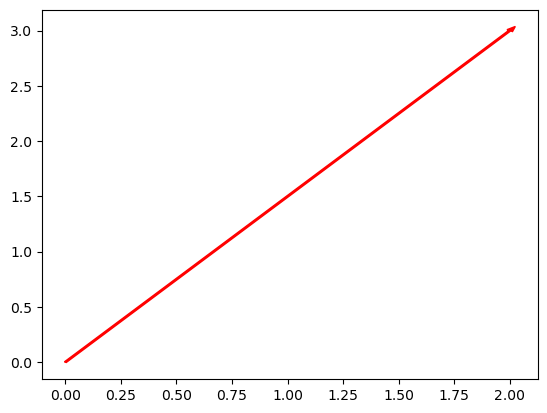

In [15]:
plt.arrow(0, 0, np.array([2, 3])[0], np.array([2, 3])[1], width=0.01, color='red')

## Operations in the vector space

In [16]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

In [17]:
3 * np.array([1, 2, 3])

array([3, 6, 9])

In [18]:
torch.tensor([1, 2, 3]) + torch.tensor([4, 5, 6])

tensor([5, 7, 9])

In [19]:
3 * torch.tensor([1, 2, 3])

tensor([3, 6, 9])

## From NumPy to PyTorch and vice-versa

In [20]:
np_array = np.array([1, 2, 3])
tensor = torch.from_numpy(np_array)
tensor

tensor([1, 2, 3])

In [21]:
tensor = torch.tensor([1, 2, 3])
np_array = tensor.numpy()
np_array

array([1, 2, 3])

## Data Types

In [22]:
vector = np.array([1, 2, 3])

In [23]:
vector.dtype

dtype('int64')

In [24]:
vector = np.array([1, 2, 3], dtype='int32')
vector


array([1, 2, 3], dtype=int32)

In [25]:
vector.dtype

dtype('int32')

In [26]:
vector = np.array([1, 2, 3], dtype='float64')
vector

array([1., 2., 3.])

In [27]:
vector.dtype

dtype('float64')

In [28]:
np.array([0, 1, 2, 3], dtype='bool')

array([False,  True,  True,  True])

In [29]:
torch.tensor([1, 2, 3]).dtype

torch.int64

In [30]:
torch.tensor([1, 2, 3], dtype=torch.float16)

tensor([1., 2., 3.], dtype=torch.float16)

## Dot Product

In [31]:
np.dot(np.array([1, 2, 3]), np.array([4, 5, 6]))

32

In [32]:
np.array([1, 2, 3]) @ np.array([4, 5, 6])

32

In [33]:
torch.dot(torch.tensor([1, 2, 3]), torch.tensor([4, 5, 6]))

tensor(32)

In [34]:
torch.tensor([1, 2, 3]) @ torch.tensor([4, 5, 6])

tensor(32)

## Norm

In [35]:
np.linalg.norm(np.array([1, 2, 3]))

3.7416573867739413

In [36]:
torch.norm(torch.tensor([1.0, 2.0, 3.0]))

tensor(3.7417)

## NumPy Matrices
Let us give values to this system:
$$
\begin{array}{lcl}
a_{11} x_1 + a_{12} x_2 &=& y_1\\
a_{21} x_1 + a_{22} x_2 &=& y_2\\
\end{array}
$$
For instance:
$$
\begin{array}{lcl}
1\times x_1 + 2\times x_2 &=& y_1\\
3 \times x_1 + 4 \times x_2 &=& y_2\\
\end{array}
$$
We have:
$$
\begin{bmatrix}
1 &2\\
3 &4\\
\end{bmatrix}  
\begin{bmatrix}
5\\
6\\
\end{bmatrix} =
\begin{bmatrix}
17\\
39\\
\end{bmatrix}
$$

In [37]:
A = np.array([[1, 2],
          [3, 4]])
A @ np.array([5, 6])

array([17, 39])

In [38]:
A[0, 1]

2

In [39]:
A = torch.tensor([[1, 2],
          [3, 4]])
A @ torch.tensor([5, 6])

tensor([17, 39])

In [40]:
A[0, 1]

tensor(2)

## Matrices and Rotations

We will now have a look at vector rotation. From algebra courses, we know that we can use a matrix to compute a rotation of angle $\theta$. For a two-dimensional vector, the rotation matrix is:
$$
\mathbf{R}_{\theta} =
\begin{bmatrix*}
\cos \theta &-\sin \theta \\
\sin \theta & \cos \theta \\
\end{bmatrix*}.
$$

In [41]:
theta_45 = np.pi/4
rot_mat_45 = np.array([[np.cos(theta_45), -np.sin(theta_45)],
          [np.sin(theta_45), np.cos(theta_45)]])
rot_mat_45

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

we rotate vector (1, 1) by this angle

In [42]:
rot_mat_45 @ np.array([1, 1])

array([1.11022302e-16, 1.41421356e+00])

The matrix of a sequence of rotations, for instance a rotation of $\pi/6$ followed by a rotation of $\pi/4$, is simply the matrix product of the individual rotations $\mathbf{R}_{{\theta}_1} \mathbf{R}_{{\theta}_2}  = \mathbf{R}_{{\theta}_1 + {\theta}_2}$, here $\mathbf{R}_{\pi/4} \mathbf{R}_{\pi/6}  = \mathbf{R}_{5\pi/12}$. 

In [43]:
theta_30 = np.pi/6
rot_mat_30 = np.array([[np.cos(theta_30), -np.sin(theta_30)],
          [np.sin(theta_30), np.cos(theta_30)]])
rot_mat_30

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [44]:
rot_mat_30 @ rot_mat_45

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [45]:
rot_mat_45 @ rot_mat_30

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [46]:
np.arccos(0.25881905)

1.3089969339255036

In [47]:
np.pi/4 + np.pi/6

1.308996938995747

With PyTorch

In [48]:
torch.from_numpy(rot_mat_30) @ torch.from_numpy(rot_mat_45)

tensor([[ 0.2588, -0.9659],
        [ 0.9659,  0.2588]], dtype=torch.float64)

In [49]:
torch.from_numpy(rot_mat_45) @ torch.from_numpy(rot_mat_30)

tensor([[ 0.2588, -0.9659],
        [ 0.9659,  0.2588]], dtype=torch.float64)

## Inverse

In [50]:
np.linalg.inv(rot_mat_30)

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [51]:
np.linalg.inv(rot_mat_30) @ rot_mat_30

array([[1.00000000e+00, 0.00000000e+00],
       [5.55111512e-17, 1.00000000e+00]])

In [52]:
torch.inverse(torch.from_numpy(rot_mat_30)) 

tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]], dtype=torch.float64)

## Size of a Matrix

In [53]:
A = np.array([[1, 2, 3],
            [4, 5, 6]])
A.shape

(2, 3)

In [54]:
A = torch.tensor([[1, 2, 3],
            [4, 5, 6]])
A.size()

torch.Size([2, 3])

In [55]:
u = np.array([1, 2, 3])
u.shape

(3,)

In [56]:
u = torch.tensor([1, 2, 3])
u.size()

torch.Size([3])

## Transpose

In [57]:
A = np.array([[1, 2],
          [3, 4]])
A.T

array([[1, 3],
       [2, 4]])

In [58]:
A = torch.tensor([[1, 2],
          [3, 4]])
A.T

tensor([[1, 3],
        [2, 4]])

## Transposing a Vector

In [59]:
x = np.array([1, 2, 3])
x.T

array([1, 2, 3])

In [60]:
x = torch.tensor([1, 2, 3])
x.T

/var/folders/29/s86dlfss3gq6ybhg4frthtxr0000gp/T/ipykernel_98013/2773976921.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)
  x.T


tensor([1, 2, 3])

## Reshaping a Vector

In [61]:
u = np.array([1, 2, 3])
u.reshape((1,3))

array([[1, 2, 3]])

In [62]:
u.reshape((1,3)).T

array([[1],
       [2],
       [3]])

In [63]:
u = torch.tensor([1, 2, 3])
u.reshape((1,-1))

tensor([[1, 2, 3]])

In [64]:
u.reshape((1,-1)).T

tensor([[1],
        [2],
        [3]])

In [65]:
u = np.array([1, 2, 3])
u.reshape((3,-1))

array([[1],
       [2],
       [3]])

## Utilities

In [66]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [67]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [68]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [69]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [70]:
np.random.rand(2, 4)

array([[0.06664094, 0.85057902, 0.00240786, 0.77574796],
       [0.72435197, 0.31889607, 0.11579383, 0.14732654]])

In [71]:
torch.rand(2, 4)

tensor([[0.0040, 0.8180, 0.8136, 0.9040],
        [0.1409, 0.6831, 0.1741, 0.3209]])

## Linear Applications

In [296]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [297]:
train_images[0].shape

(28, 28)

In [298]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

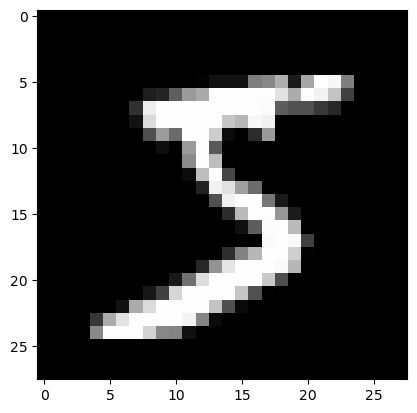

In [303]:
plt.figure()
plt.imshow(train_images[0]/255, cmap='gray')

We create an image from the matrix with the coordinate conventions

In [333]:
gray_image = np.zeros(train_images[0].shape)
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray_image[x, y] = train_images[0].T[x, train_images[0].shape[1] - 1 - y]

The image

(-50.0, 50.0)

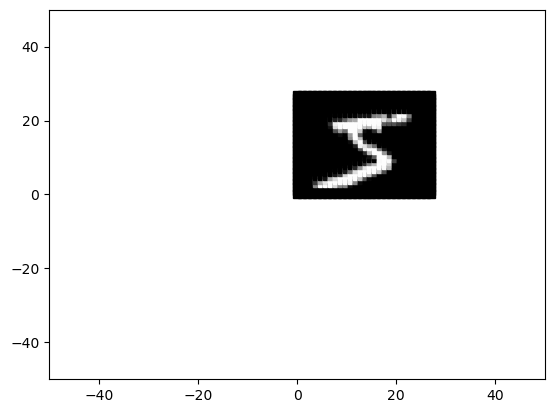

In [350]:
fig, ax = plt.subplots()
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray = int(gray_image[x, y])
        format(gray, '02x') * 3
        ax.plot(x, y, marker='s', color='#' + format(gray, '02x') * 3, linestyle='')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

Scaling

In [359]:
scale_mat = np.array([[2, 0], 
                      [0, 0.5]])

(-50.0, 50.0)

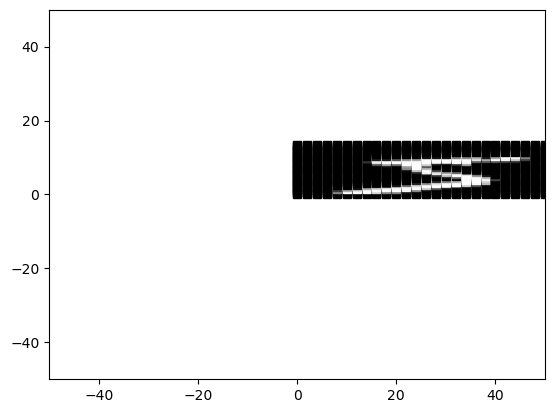

In [360]:
fig, ax = plt.subplots()
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray = int(gray_image[x, y])
        format(gray, '02x') * 3
        mapping_xy = scale_mat @ np.array([x, y])
        ax.plot(mapping_xy[0], mapping_xy[1], marker='s', color='#' + format(gray, '02x') * 3, linestyle='')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

Rotating

(-50.0, 50.0)

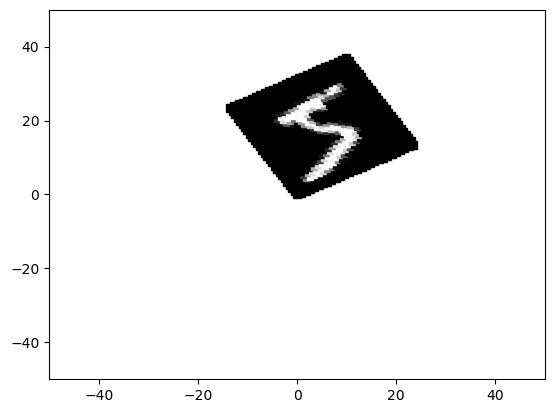

In [361]:
fig, ax = plt.subplots()
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray = int(gray_image[x, y])
        format(gray, '02x') * 3
        mapping_xy = rot_mat_30 @ np.array([x, y])
        ax.plot(mapping_xy[0], mapping_xy[1], marker='s', color='#' + format(gray, '02x') * 3, linestyle='')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

$$\mathbf{W}\mathbf{x} + \mathbf{b}$$

(-50.0, 50.0)

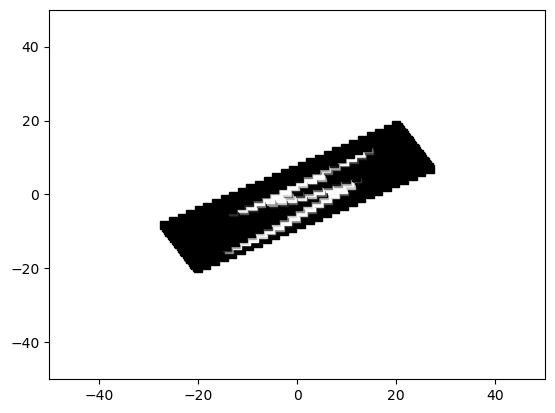

In [369]:
fig, ax = plt.subplots()
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray = int(gray_image[x, y])
        format(gray, '02x') * 3
        mapping_xy = rot_mat_30 @ scale_mat @ np.array([x, y]) + np.array([-20, -20])
        ax.plot(mapping_xy[0], mapping_xy[1], marker='s', color='#' + format(gray, '02x') * 3, linestyle='')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

Nonlinearity

(-50.0, 50.0)

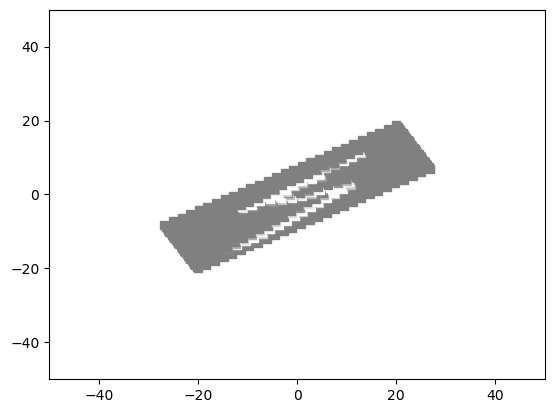

In [370]:
fig, ax = plt.subplots()
for x in np.arange(train_images[0].shape[0]):
    for y in np.arange(train_images[0].shape[1]):
        gray = np.maximum(128, int(gray_image[x, y]))
        format(gray, '02x') * 3
        mapping_xy = rot_mat_30 @ scale_mat @ np.array([x, y]) + np.array([-20, -20])
        ax.plot(mapping_xy[0], mapping_xy[1], marker='s', color='#' + format(gray, '02x') * 3, linestyle='')
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

## Matrices and Neural Nets: One Layer

### Keras

In [72]:
layer1_k = keras.Sequential([
    layers.Dense(4, input_dim=3, use_bias=False)
    ])

2022-10-29 10:35:27.508341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [73]:
layer1_k.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[ 0.1147995 , -0.62572294, -0.40983397, -0.5968498 ],
        [-0.2010414 , -0.8794393 ,  0.10259748, -0.52053523],
        [ 0.47562158,  0.75489044, -0.41001147,  0.47887516]],
       dtype=float32)>]

In [74]:
x_np = np.array([[1, 2, 3]])

In [75]:
layer1_k(x_np)

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 1.1395814 , -0.11993027, -1.4346733 , -0.20129478]],
      dtype=float32)>

In [76]:
x_np @ layer1_k.weights[0]

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[ 1.1395814 , -0.11993027, -1.4346733 , -0.20129478]],
      dtype=float32)>

### PyTorch

In [77]:
layer1_t = torch.nn.Linear(3, 4, bias=False)

In [78]:
layer1_t.weight

Parameter containing:
tensor([[-0.2227,  0.3306, -0.2361],
        [ 0.2491, -0.0881, -0.3629],
        [-0.3289,  0.1477, -0.0636],
        [ 0.2513, -0.4159,  0.0263]], requires_grad=True)

In [79]:
x_t = torch.tensor([1.0, 2.0, 3.0])

In [80]:
layer1_t(x_t)

tensor([-0.2700, -1.0157, -0.2244, -0.5018], grad_fn=<SqueezeBackward3>)

In [81]:
layer1_t.weight @ x_t

tensor([-0.2700, -1.0157, -0.2244, -0.5018], grad_fn=<MvBackward0>)

Or see: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [82]:
x_t @ layer1_t.weight.T

tensor([-0.2700, -1.0157, -0.2244, -0.5018], grad_fn=<SqueezeBackward3>)

## Matrices and Neural Nets: More Layers

### Keras

In [83]:
nn_k = keras.Sequential([
    layers.Dense(4, input_dim=3, use_bias=False),
    layers.Dense(2, use_bias=False),
    layers.Dense(1, use_bias=False)
    ])

In [84]:
nn_k.weights

[<tf.Variable 'dense_1/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.4278257 ,  0.7547064 ,  0.10550451,  0.03234905],
        [-0.58570874, -0.5083163 , -0.4768471 ,  0.6148857 ],
        [-0.53428507,  0.7947674 , -0.83726215, -0.13393134]],
       dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.9361608 , -0.58433414],
        [-0.9977844 , -0.95682406],
        [ 0.4549482 , -0.41785932],
        [ 0.7583747 , -0.3208456 ]], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.1308026 ],
        [ 0.37055206]], dtype=float32)>]

In [85]:
nn_k(x_np)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[7.1340375]], dtype=float32)>

In [86]:
x_np @ nn_k.weights[0] @ nn_k.weights[1] @ nn_k.weights[2]

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[7.1340375]], dtype=float32)>

### PyTorch

In [87]:
layer1_t = torch.nn.Linear(3, 4, bias=False)
layer2_t = torch.nn.Linear(4, 2, bias=False)
layer3_t = torch.nn.Linear(2, 1, bias=False)

In [88]:
(layer1_t.weight, layer2_t.weight, layer3_t.weight)

(Parameter containing:
 tensor([[ 0.3011,  0.2104, -0.4571],
         [-0.0646, -0.3317, -0.3089],
         [-0.3900, -0.1020, -0.2278],
         [-0.1385,  0.3165,  0.0657]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0602,  0.4850,  0.1278,  0.4607],
         [-0.0315, -0.3692, -0.3080, -0.3204]], requires_grad=True),
 Parameter containing:
 tensor([[-0.3436, -0.1657]], requires_grad=True))

In [89]:
layer3_t(layer2_t(layer1_t(x_t)))

tensor([0.1027], grad_fn=<SqueezeBackward3>)

In [90]:
x_t @ layer1_t.weight.T @ layer2_t.weight.T @ layer3_t.weight.T

tensor([0.1027], grad_fn=<SqueezeBackward3>)

## Datasets

In [91]:
from sklearn.datasets import load_iris

In [92]:
iris_dataset = load_iris()

In [93]:
X = torch.from_numpy(iris_dataset['data']).float()

In [94]:
X.dtype

torch.float32

In [95]:
layer1_t = torch.nn.Linear(4, 25, bias=False)
layer2_t = torch.nn.Linear(25, 25, bias=False)
layer3_t = torch.nn.Linear(25, 3, bias=False)

In [96]:
layer3_t(layer2_t(layer1_t(X)))

tensor([[ 0.8766, -0.2090,  0.5333],
        [ 0.8141, -0.2013,  0.4681],
        [ 0.8081, -0.1918,  0.4893],
        [ 0.8086, -0.1973,  0.4694],
        [ 0.8780, -0.2064,  0.5426],
        [ 0.9869, -0.2182,  0.5950],
        [ 0.8391, -0.1869,  0.5147],
        [ 0.8682, -0.2101,  0.5161],
        [ 0.7653, -0.1864,  0.4427],
        [ 0.8210, -0.2132,  0.4707],
        [ 0.9278, -0.2228,  0.5627],
        [ 0.8613, -0.2087,  0.5081],
        [ 0.7949, -0.2055,  0.4586],
        [ 0.7288, -0.1777,  0.4530],
        [ 0.9608, -0.2223,  0.6172],
        [ 1.0395, -0.2200,  0.6681],
        [ 0.9514, -0.2006,  0.6054],
        [ 0.8879, -0.2019,  0.5401],
        [ 0.9900, -0.2337,  0.5844],
        [ 0.9248, -0.2074,  0.5734],
        [ 0.9176, -0.2306,  0.5216],
        [ 0.9268, -0.1999,  0.5682],
        [ 0.8109, -0.1771,  0.5422],
        [ 0.9185, -0.2002,  0.5219],
        [ 0.8880, -0.2219,  0.5002],
        [ 0.8398, -0.2130,  0.4656],
        [ 0.8998, -0.2003,  0.5270],
 

In [97]:
X @ layer1_t.weight.T @ layer2_t.weight.T @ layer3_t.weight.T

tensor([[ 0.8766, -0.2090,  0.5333],
        [ 0.8141, -0.2013,  0.4681],
        [ 0.8081, -0.1918,  0.4893],
        [ 0.8086, -0.1973,  0.4694],
        [ 0.8780, -0.2064,  0.5426],
        [ 0.9869, -0.2182,  0.5950],
        [ 0.8391, -0.1869,  0.5147],
        [ 0.8682, -0.2101,  0.5161],
        [ 0.7653, -0.1864,  0.4427],
        [ 0.8210, -0.2132,  0.4707],
        [ 0.9278, -0.2228,  0.5627],
        [ 0.8613, -0.2087,  0.5081],
        [ 0.7949, -0.2055,  0.4586],
        [ 0.7288, -0.1777,  0.4530],
        [ 0.9608, -0.2223,  0.6172],
        [ 1.0395, -0.2200,  0.6681],
        [ 0.9514, -0.2006,  0.6054],
        [ 0.8879, -0.2019,  0.5401],
        [ 0.9900, -0.2337,  0.5844],
        [ 0.9248, -0.2074,  0.5734],
        [ 0.9176, -0.2306,  0.5216],
        [ 0.9268, -0.1999,  0.5682],
        [ 0.8109, -0.1771,  0.5422],
        [ 0.9185, -0.2002,  0.5219],
        [ 0.8880, -0.2219,  0.5002],
        [ 0.8398, -0.2130,  0.4656],
        [ 0.8998, -0.2003,  0.5270],
 